In [1]:
# Load the packages
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/[RBAC 2023] Round 2 Dataset.csv')

In [3]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

last_date = df['TransactionDate'].max()

last_month = last_date.to_period('M')

df_filtered = df[df['TransactionDate'].dt.to_period('M') != last_month]

df = df_filtered

C:\Users\DELL\AppData\Local\Temp\ipykernel_544\2015237899.py:5: UserWarning: Converting to Period representation will drop timezone information.
  last_month = last_date.to_period('M')
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [4]:
df
print(df.columns.tolist())

['Unnamed: 0', 'BillID', 'Channel', 'OrderFrom', 'TransactionDate', 'SalesAmount', 'CustomerID', 'CustomerGender', 'VoucherStatus', 'Province']


      Month CustomerGender   SalesAmount
0   2021-10         Female  3.594421e+09
1   2021-10           Male  4.932735e+09
2   2021-10        Unknown  1.289177e+10
3   2021-11         Female  3.401636e+09
4   2021-11           Male  4.432859e+09
..      ...            ...           ...
58  2023-05           Male  8.219074e+09
59  2023-05        Unknown  1.096636e+10
60  2023-06         Female  2.585700e+09
61  2023-06           Male  6.904120e+09
62  2023-06        Unknown  1.021705e+10

[63 rows x 3 columns]
      Month            Province   SalesAmount
0   2021-10               Hanoi  7.259995e+09
1   2021-10    Ho Chi Minh City  6.998181e+09
2   2021-10   Nothern Provinces  2.329888e+09
3   2021-10  Southern Provinces  4.830865e+09
4   2021-11               Hanoi  6.019509e+09
..      ...                 ...           ...
79  2023-05  Southern Provinces  5.240577e+09
80  2023-06               Hanoi  6.195575e+09
81  2023-06    Ho Chi Minh City  5.894966e+09
82  2023-06   Nothern Pro

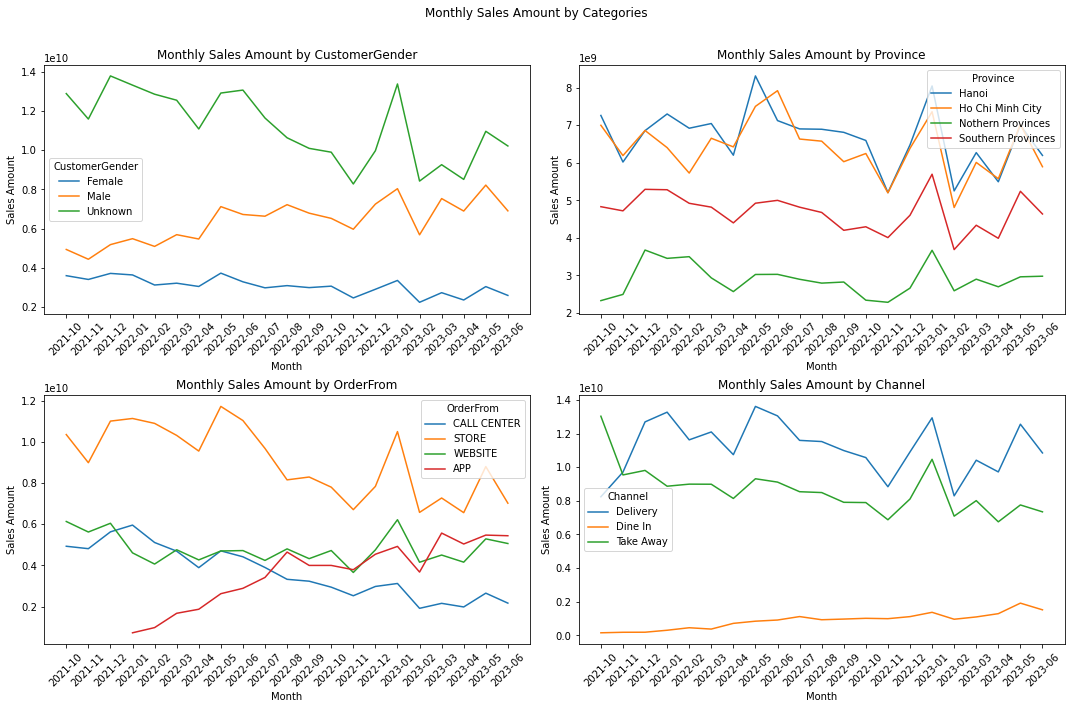

In [5]:
# 4 chart riêng tính tổng sales amount breakdown của 4 mục gender/region/channel/platform dao động theo tháng
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.strftime('%Y-%m')

categories = ['CustomerGender', 'Province', 'OrderFrom', 'Channel']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Monthly Sales Amount by Categories')

for ax, category in zip(axes.flatten(), categories):
    
    monthly_sales = df.groupby(['Month', category])['SalesAmount'].sum().reset_index()

    sns.lineplot(data=monthly_sales, x='Month', y='SalesAmount', hue=category, ax=ax)
    ax.set_title(f'Monthly Sales Amount by {category}')
    ax.set_ylabel('Sales Amount')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x', rotation=45)
    
#   Export to csv file
    str_monthly_sales = "monthly_sales_by_" + str(category) + ".csv"
    path = 'C:/Users/DELL/Desktop/RBAC-2023/Data/' + str_monthly_sales
    monthly_sales.to_csv(path, index=False)
    print(monthly_sales)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Month
2021-10    64247
2021-11    60345
2021-12    68127
2022-01    68655
2022-02    65683
2022-03    66749
2022-04    59047
2022-05    63617
2022-06    64031
2022-07    62045
2022-08    60363
2022-09    53583
2022-10    54419
2022-11    47165
2022-12    52823
2023-01    62668
2023-02    47347
2023-03    53610
2023-04    50954
2023-05    52232
2023-06    52800
Freq: M, Name: CustomerID, dtype: int64
Quarter
2021Q4    167815
2022Q1    175109
2022Q2    162561
2022Q3    152049
2022Q4    132883
2023Q1    141361
2023Q2    132385
Freq: Q-DEC, Name: CustomerID, dtype: int64


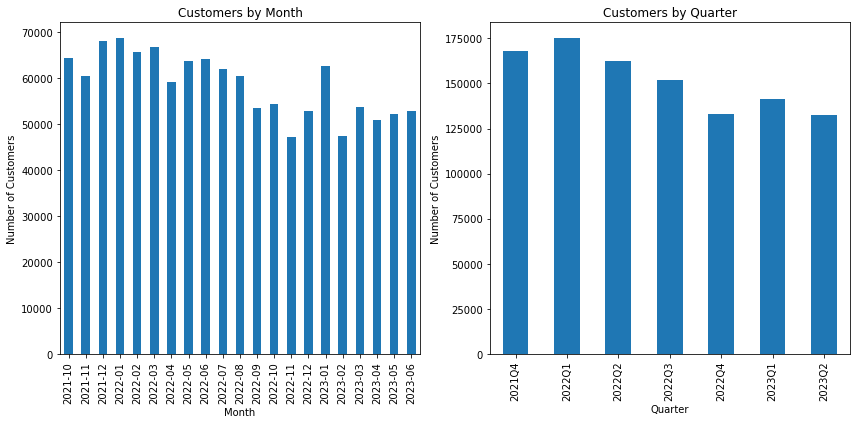

In [6]:
# Monthly/Quarterly total number customer
import pandas as pd

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['Month'] = df['TransactionDate'].dt.to_period('M')
customers_by_month = df.groupby('Month')['CustomerID'].nunique()

df['Quarter'] = df['TransactionDate'].dt.to_period('Q')
customers_by_quarter = df.groupby('Quarter')['CustomerID'].nunique()

# Export to csv file
str_customers_by_month = "customers_by_month.csv"
str_customers_by_quarter = "customers_by_quarter.csv"
path = 'C:/Users/DELL/Desktop/RBAC-2023/Data/'
customers_by_month.to_csv(path + str_customers_by_month)
customers_by_quarter.to_csv(path + str_customers_by_quarter)

print(customers_by_month)
print(customers_by_quarter)

# plot the graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
customers_by_month.plot(kind='bar')
plt.title('Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
customers_by_quarter.plot(kind='bar')
plt.title('Customers by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

CustomerGender
Female      61253
Male       128585
Unknown    528212
Name: CustomerID, dtype: int64
OrderFrom
APP             91981
CALL CENTER    121197
STORE          423947
WEBSITE        196051
Name: CustomerID, dtype: int64
Channel
Delivery     342488
Dine In       23156
Take Away    436198
Name: CustomerID, dtype: int64
Province
Hanoi                 210507
Ho Chi Minh City      203300
Nothern Provinces     135048
Southern Provinces    179297
Name: CustomerID, dtype: int64


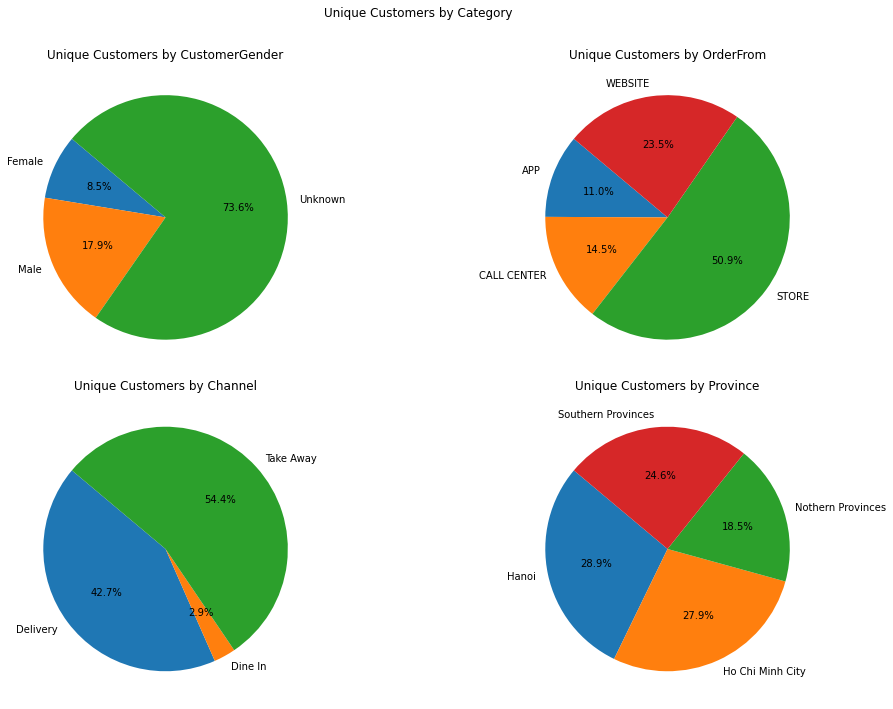

In [7]:
categories = ['CustomerGender', 'OrderFrom', 'Channel', 'Province']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Unique Customers by Category')

for ax, category in zip(axes.flatten(), categories):
    customer_count = df.groupby(category)['CustomerID'].nunique()

    ax.pie(customer_count, labels=customer_count.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Unique Customers by {category}')
#     Export to csv files
    str_customer_count = "customer_count_by_" + str(category) + ".csv"
    path = 'C:/Users/DELL/Desktop/RBAC-2023/Data/' + str_customer_count
    customer_count.to_csv(path)
    print(customer_count)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


CustomerGender  Female   Male  Unknown
Month                                 
2021-10          10810  15263    45650
2021-11          10599  14420    42838
2021-12          11265  16070    49993
2022-01          10900  17432    49144
2022-02           9645  15838    47064
2022-03          10027  18003    47149
2022-04           8956  16520    40703
2022-05           9946  19177    42726
2022-06           8960  18626    44608
2022-07           8886  19850    42064
2022-08           8996  21628    38229
2022-09           8052  18476    34106
2022-10           8576  18337    34905
2022-11           6908  17104    29911
2022-12           7596  19515    33596
2023-01           8350  21012    42061
2023-02           6448  17178    30532
2023-03           7555  22023    32586
2023-04           6911  20824    31109
2023-05           7351  20850    32294
2023-06           7015  19543    34493
Province  Hanoi  Ho Chi Minh City  Nothern Provinces  Southern Provinces
Month                         

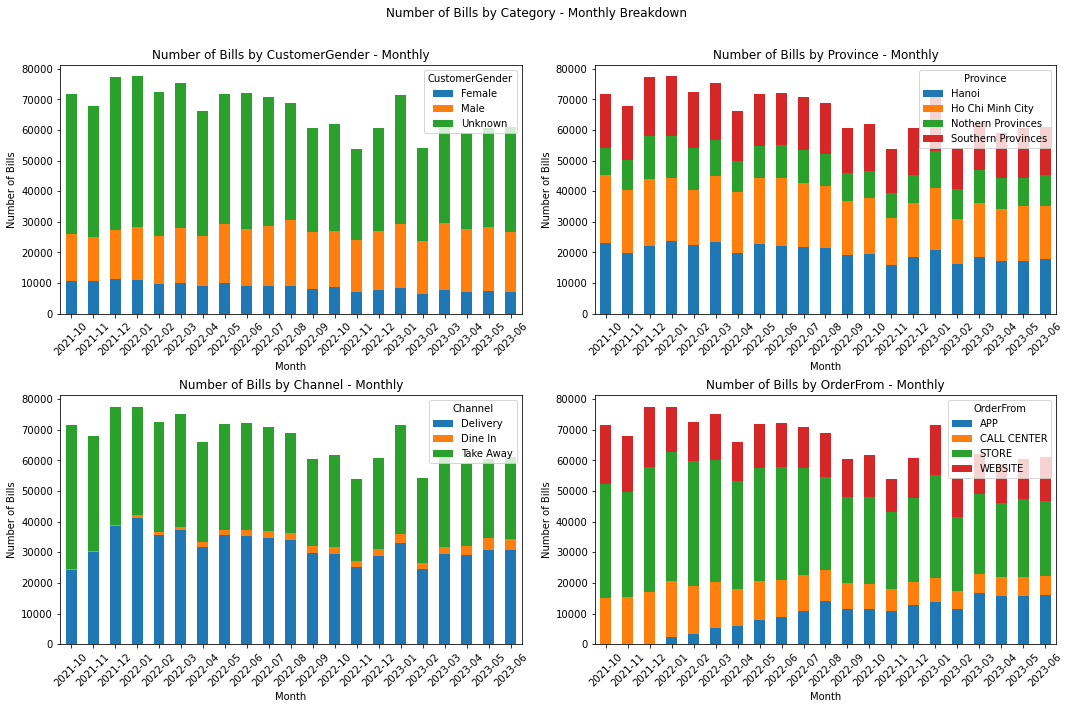

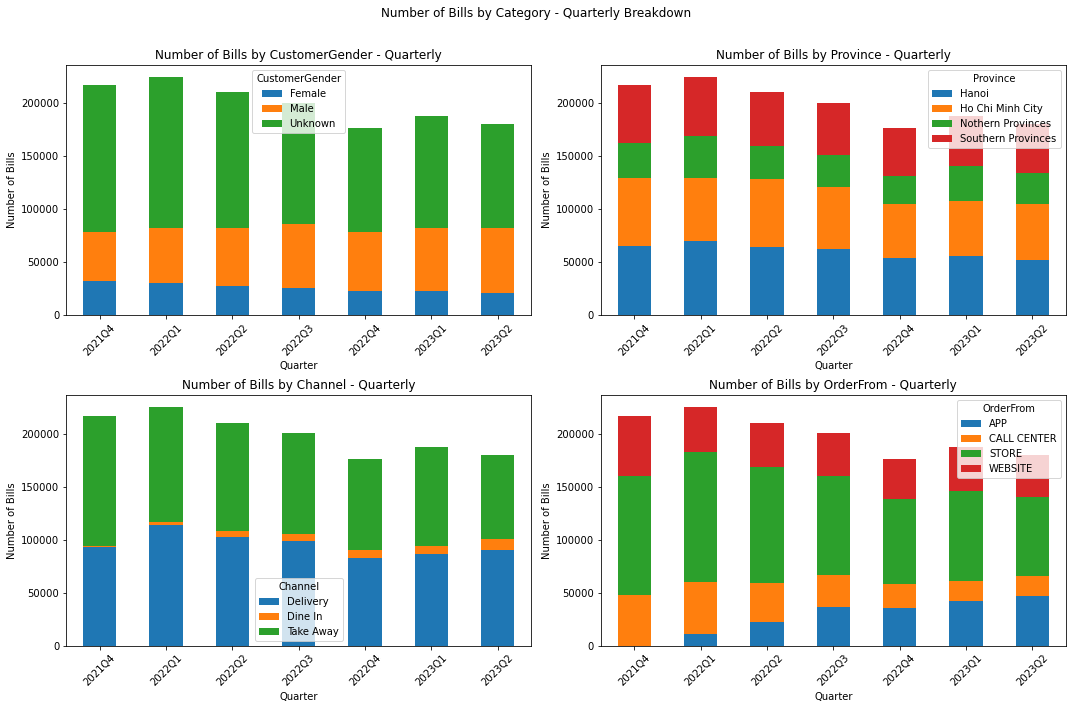

In [8]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')
df['Quarter'] = df['TransactionDate'].dt.to_period('Q')

categories = ['CustomerGender', 'Province', 'Channel', 'OrderFrom']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Number of Bills by Category - Monthly Breakdown')

for ax, category in zip(axes.flatten(), categories):
    monthly_data = df.groupby(['Month', category]).size().unstack().fillna(0)
    
    monthly_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Number of Bills by {category} - Monthly')
    ax.set_ylabel('Number of Bills')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x', rotation=45)
    
#     Export to csv files
    str_monthly_data = "monthly_data_by_" + str(category) + ".csv"
    path = 'C:/Users/DELL/Desktop/RBAC-2023/Data/' + str_monthly_data
    monthly_data.to_csv(path)
    print(monthly_data)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Number of Bills by Category - Quarterly Breakdown')

for ax, category in zip(axes.flatten(), categories):
    quarterly_data = df.groupby(['Quarter', category]).size().unstack().fillna(0)
    
    quarterly_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Number of Bills by {category} - Quarterly')
    ax.set_ylabel('Number of Bills')
    ax.set_xlabel('Quarter')
    ax.tick_params(axis='x', rotation=45)
    
    str_qly_data = "quarterly_data_by_" + str(category) + ".csv"
    path = 'C:/Users/DELL/Desktop/RBAC-2023/Data/' + str_qly_data
    quarterly_data.to_csv(path)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


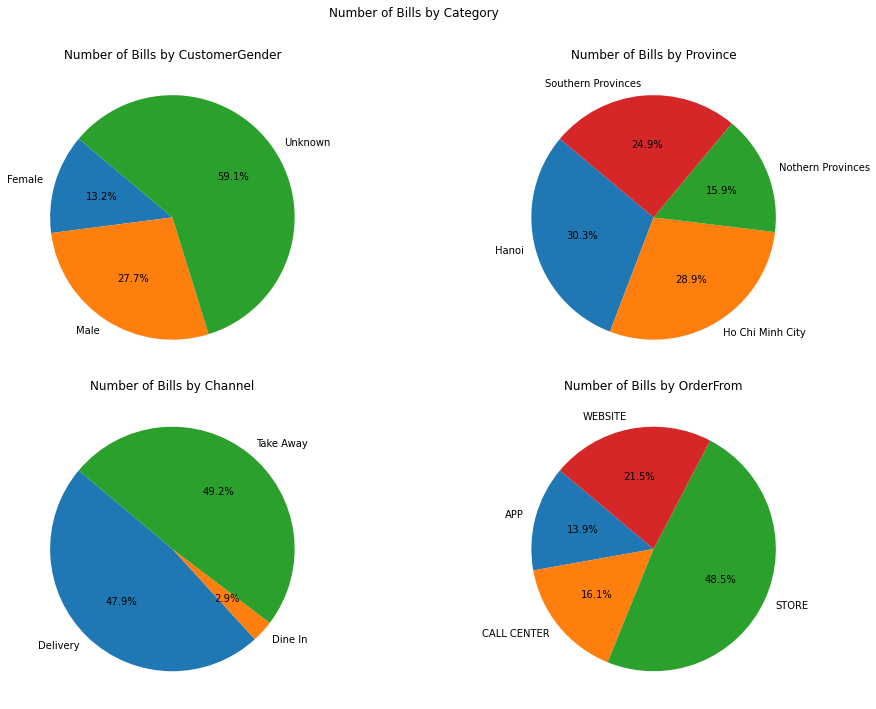

In [9]:
categories = ['CustomerGender', 'Province', 'Channel', 'OrderFrom']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Number of Bills by Category')

for ax, category in zip(axes.flatten(), categories):
    bill_count = df.groupby(category).size()

    ax.pie(bill_count, labels=bill_count.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Number of Bills by {category}')
    
    str_bill_count = "monthly_data_by_" + str(category) + ".csv"
    path = 'C:/Users/DELL/Desktop/RBAC-2023/Data/' + str_bill_count
    bill_count.to_csv(path)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

   Percentile  Number of Bills
0        0.25              1.0
1        0.50              1.0
2        0.75              2.0
3        0.95              6.0
4        0.99             13.0


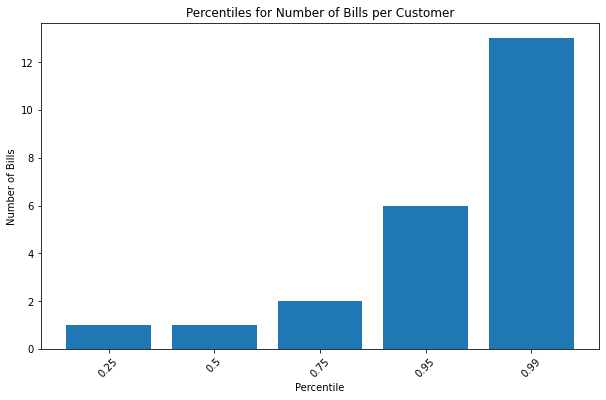

In [10]:
bills_per_customer = df.groupby('CustomerID').size()

percentiles = [0.25, 0.5, 0.75, 0.95, 0.99] 
percentile_values = bills_per_customer.quantile(percentiles)

percentile_data = pd.DataFrame({'Percentile': percentiles, 'Number of Bills': percentile_values.values})

# Export to csv file
path = 'C:/Users/DELL/Desktop/RBAC-2023/Data/percentile_data.csv'
percentile_data.to_csv(path)
print(percentile_data)

plt.figure(figsize=(10, 6))
plt.bar(x=percentile_data['Percentile'].astype(str), height=percentile_data['Number of Bills'])
plt.title('Percentiles for Number of Bills per Customer')
plt.xlabel('Percentile')
plt.ylabel('Number of Bills')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Month
2021-10    1.116363
2021-11    1.124484
2021-12    1.135057
2022-01    1.128483
2022-02    1.104502
2022-03    1.126294
2022-04    1.120785
2022-05    1.129399
2022-06    1.127485
2022-07    1.141107
2022-08    1.140649
2022-09    1.131590
2022-10    1.135964
2022-11    1.143284
2022-12    1.149253
2023-01    1.139704
2023-02    1.143853
2023-03    1.159560
2023-04    1.154846
2023-05    1.158198
2023-06    1.156269
Freq: M, dtype: float64
Quarter
2021Q4    1.292542
2022Q1    1.286068
2022Q2    1.293188
2022Q3    1.317253
2022Q4    1.327845
2023Q1    1.328124
2023Q2    1.362617
Freq: Q-DEC, dtype: float64


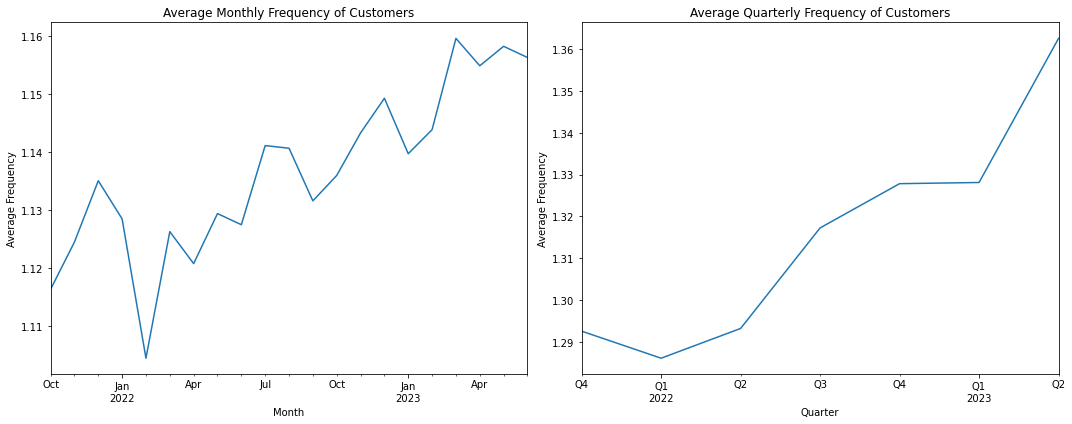

In [11]:
# Average Frequency of Customers
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')
df['Quarter'] = df['TransactionDate'].dt.to_period('Q')

monthly_frequency = df.groupby(['CustomerID', 'Month']).size().groupby('Month').mean()

quarterly_frequency = df.groupby(['CustomerID', 'Quarter']).size().groupby('Quarter').mean()

# Export to csv files
monthly_frequency.to_csv('C:/Users/DELL/Desktop/RBAC-2023/Data/monthly_frequency.csv')
quarterly_frequency.to_csv('C:/Users/DELL/Desktop/RBAC-2023/Data/quarterly_frequency.csv')
print(monthly_frequency)
print(quarterly_frequency)


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
monthly_frequency.plot(kind='line')
plt.title('Average Monthly Frequency of Customers')
plt.xlabel('Month')
plt.ylabel('Average Frequency')

plt.subplot(1, 2, 2)
quarterly_frequency.plot(kind='line')
plt.title('Average Quarterly Frequency of Customers')
plt.xlabel('Quarter')
plt.ylabel('Average Frequency')

plt.tight_layout()
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Month
2021-10     4.072613
2021-11     4.163167
2021-12     2.543710
2022-01     5.645619
2022-02     3.884378
2022-03     4.142114
2022-04     5.229756
2022-05     6.285404
2022-06     5.186027
2022-07    10.309322
2022-08    20.996906
2022-09    17.086123
2022-10    15.482546
2022-11    16.527270
2022-12    20.040523
2023-01    18.862271
2023-02    17.923483
2023-03    26.097098
2023-04    23.081368
2023-05    24.168940
2023-06    27.021670
Freq: M, Name: VoucherUsed, dtype: float64
Year
2021     3.555885
2022    10.440320
2023    22.845424
Name: VoucherUsed, dtype: float64


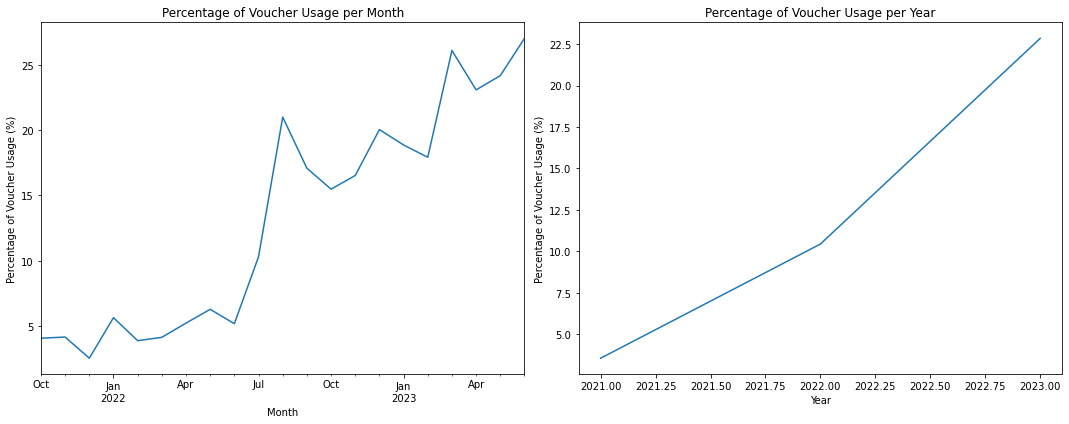

In [12]:
# %Voucher use in month, quarter.
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')
df['Year'] = df['TransactionDate'].dt.year

df['VoucherUsed'] = df['VoucherStatus'].apply(lambda x: 1 if x == 'Yes' else 0)

monthly_voucher_use = df.groupby('Month')['VoucherUsed'].mean() * 100

yearly_voucher_use = df.groupby('Year')['VoucherUsed'].mean() * 100

# Export to csv files
monthly_voucher_use.to_csv('C:/Users/DELL/Desktop/RBAC-2023/Data/monthly_voucher_use.csv')
yearly_voucher_use.to_csv('C:/Users/DELL/Desktop/RBAC-2023/Data/quarterly_frequency.csv')
print(monthly_voucher_use)
print(yearly_voucher_use)

# Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
monthly_voucher_use.plot(kind='line')
plt.title('Percentage of Voucher Usage per Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Voucher Usage (%)')

plt.subplot(1, 2, 2)
yearly_voucher_use.plot(kind='line')
plt.title('Percentage of Voucher Usage per Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Voucher Usage (%)')

plt.tight_layout()
plt.show()
